<h1>Kapitel 13 Mer om Regressionsanalys</h1>

In [2]:
#importera paket och exempeldata 
import numpy as np
import pandas as pd
import scipy.stats as scs 

import matplotlib.pyplot as plt
import seaborn as sns

# import statsmodels.api as sm
from statsmodels.formula.api import ols

# importera palmer penguins
filepath = 'Data/penguins.csv'
penguins = pd.read_csv(filepath)
penguins = penguins.dropna().reset_index() # Plocka bort rader som innehåller NaN

In [3]:
penguins = penguins.sample(30)
penguins.head()

,index,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
288,299,Chinstrap,Dream,50.6,19.4,193.0,3800.0,male,2007
278,289,Chinstrap,Dream,52.0,18.1,201.0,4050.0,male,2007
173,180,Gentoo,Biscoe,48.2,14.3,210.0,4600.0,female,2007
325,336,Chinstrap,Dream,51.9,19.5,206.0,3950.0,male,2009
0,0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007


<h3>Korrelationstest med scipy.stats</h3>

In [4]:
r, p = scs.pearsonr(penguins['flipper_length_mm'], penguins['body_mass_g'])
r, p

(0.852872684400345, 2.1670451953752026e-09)

<h3>Konfidensintervall och hypotestest för koefficienterna i regressionsmodellen</h3>

In [5]:
model = ols('flipper_length_mm ~ body_mass_g', data=penguins).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      flipper_length_mm   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     74.71
Date:                Mon, 06 Feb 2023   Prob (F-statistic):           2.17e-09
Time:                        14:21:15   Log-Likelihood:                -97.114
No. Observations:                  30   AIC:                             198.2
Df Residuals:                      28   BIC:                             201.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     133.4097      7.243     18.419      

<h3>Prediktionsintervall in sample-prediktion</h3>

In [6]:
predictions = model.get_prediction(penguins['body_mass_g'])

frame=predictions.summary_frame(alpha=0.05)
ypred=frame['mean']

frame[['obs_ci_lower','obs_ci_upper']]

,obs_ci_lower,obs_ci_upper
0,181.197238,207.756435
1,185.192986,211.795836
2,193.746828,220.919322
3,183.602869,210.171894
4,180.389901,206.956742
5,182.803722,209.364011
6,175.488798,202.215667
7,177.951542,204.574012
8,187.557812,214.252100
9,197.531534,225.169764


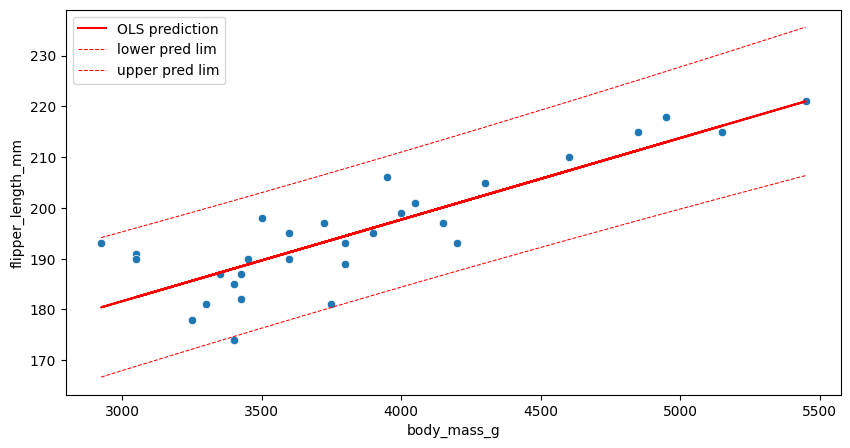

In [7]:
order = np.argsort(penguins['body_mass_g'])
xs = np.array(penguins['body_mass_g'])[order]
# ys = np.array(frame['obs_ci_lower'])[order]

fig, ax = plt.subplots(figsize=(10,5))

sns.scatterplot(data=penguins, x='body_mass_g', y='flipper_length_mm')
ax.plot(penguins['body_mass_g'], ypred, "r", label="OLS prediction")

order = np.argsort(penguins['body_mass_g'])
x = np.array(penguins['body_mass_g'])[order]
lower = np.array(frame['obs_ci_lower'])[order]
upper = np.array(frame['obs_ci_upper'])[order]

ax.plot(xs, lower, 'r--', label="lower pred lim", linewidth=0.75)
ax.plot(xs, upper, 'r--', label="upper pred lim", linewidth=0.75)


ax.legend(loc="best")
plt.show()

<h3>Prediktionsintervall out of sample-prediktion</h3>

      body_mass_g
0        0.000000
1      151.057402
2      302.114804
3      453.172205
4      604.229607
..            ...
327  49395.770393
328  49546.827795
329  49697.885196
330  49848.942598
331  50000.000000

[332 rows x 1 columns]


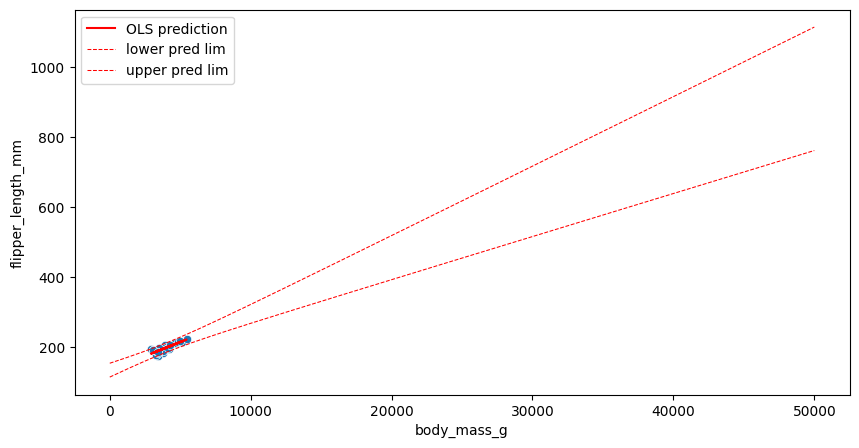

In [8]:
xs = pd.DataFrame(np.linspace(0,50000,332), columns=['body_mass_g'])
print(xs)

predictions = model.get_prediction(xs)
frame = predictions.summary_frame(alpha=0.05)
lower = frame['obs_ci_lower']
upper = frame['obs_ci_upper']

fig, ax = plt.subplots(figsize=(10,5))

sns.scatterplot(data=penguins, x='body_mass_g', y='flipper_length_mm')
ax.plot(penguins['body_mass_g'], ypred, "r", label="OLS prediction")

ax.plot(xs, lower, 'r--', label="lower pred lim", linewidth=0.75)
ax.plot(xs, upper, 'r--', label="upper pred lim", linewidth=0.75)

ax.legend(loc="best")
plt.show()